# Analysis of implemented heuristics functions

The implementations in this code are different variations of either hunting or avoiding the opponent, while simultaneously trying to keep the future number of explorable moves high.

It turned out that while most of the implementations are consistently better against (pure) minimax players,
they tend to behave worse against alpha-beta pruned minimax with iterative deepening. Here, the problem may lie very well in the fact that "smarter" implementations might take longer to evaluate, which in turn can prevent the iterative deepening approach from exploring more actual states - in essence, even "dumb" heuristics might be good when evaluated fast enough.

Sadly, the sequential implementation in `tournament.py` prevents fast iterations on ideas, while the (necessarily) low number of iterations provides only a very rough statistic of the actual performance.

## Heuristics functions

The evaluated heuristics functions were:

* `diff_opportunities_hunter`
* `diff_opportunities_pow`
* `diff_opportunities_centered`
* `counter_opponent` 
* `own_moves`
* `opponent_moves`

### `diff_opportunities_hunter`

This function obtains its score by comparing the players available moves with the opponent's, but additionally attempts to reduce the distance between the two players. The distance metric is minimal in a distance of three fields, which is the distance a player can move in one turn. The idea is to try to steal a possible future move from the opponent.

### `diff_opportunities_pow`

This function projects the current player positions into possible future moves. It takes both the differences of directly possible and projected moves and obtains a score by multiplying exponentials of these values (rather, bases, raised to the power of these). Since negative opponents result in values less than one, either situation in favor of the opponent would result in a multiplication with a small value, reducing the score.

### `diff_opportunities_centered`

This takes the idea of possible future moves a step further by going two turns into the future. First, the opponent's possible moves are determined and every move the player could take (thus preventing the opponent from going there) are removed. Then, the opponent does the same with projected moves for the player. One additional round of obtaining moves for the opponent is performed and the number of available moves that cannot be "countered" is returned as a part of the score.
The final score is a difference between player scores, with an attraction to the board center mixed in to avoid corners.

### `counter_opponent`

This method obtains a higher weight for future moves the opponent _could_ take, if the move wouldn't be taken by the player. The idea is to actively steal good moves from the opponent.


### `own_moves`

Giving a higher weight to the player's future moves, this method attempts to give high visibility to moves that lead into big open spaces in the future.

### ` opponent_moves`

An easier variant of `own_moves`, this method gives higher weights to opponent'a future moves, thus aiming to prevent the opponent from getting good opportunities in the future.

## Evaluation

Between three and four tournaments of ten matches each were run using the different heuristics functions to evaluate their performance. Since the `AB_Improved` player was present in all runs, it should obtain the most correct rating out of all observations. As it turned out, the `AB_Improved` heuristic was unmatched by any experiment I ran.

In [8]:
import pandas as pd
df = pd.DataFrame({
    'Algorithm': (
        'AB_Improved', 'diff_opportunities_hunter',  'diff_opportunities_pow', 
        'counter_opponent',  'own_moves', 'diff_opportunities_centered', 'opponent_moves'),
    'Total':      (0.7184, 0.5857, 0.5810, 0.5667, 0.5750, 0.5464, 0.5857),
    'Alpha-Beta': (0.5810, 0.4556, 0.4000, 0.3778, 0.4500, 0.3917, 0.4500),
    'MiniMax':    (0.7667, 0.6111, 0.6556, 0.6444, 0.6167, 0.6083, 0.6417),
    'Random':     (0.9857, 0.9000, 0.9000, 0.9000, 0.8250, 0.8250, 0.8250)
})
df

,Algorithm,Alpha-Beta,MiniMax,Random,Total
0,AB_Improved,0.5810,0.7667,0.9857,0.7184
1,diff_opportunities_hunter,0.4556,0.6111,0.9000,0.5857
2,diff_opportunities_pow,0.4000,0.6556,0.9000,0.5810
3,counter_opponent,0.3778,0.6444,0.9000,0.5667
4,own_moves,0.4500,0.6167,0.8250,0.5750
5,diff_opportunities_centered,0.3917,0.6083,0.8250,0.5464
6,opponent_moves,0.4500,0.6417,0.8250,0.5857


Data was reshaped to obtain a grouped bar plot. The bars are ordered starting with total performance, then continuing from hardest opponent class (alpha-beta pruned MiniMax) to easiest opponent (random player).

In [7]:
df2 = pd.melt(df, id_vars=['Algorithm'], 
              var_name='opponent_type', value_name='win_rate')
df2['opponent_type'] = pd.Categorical(df2['opponent_type'], 
                                      ['Total', 'Alpha-Beta', 'MiniMax', 'Random'])
df2 = df2.sort_values(['Algorithm', 'opponent_type'])

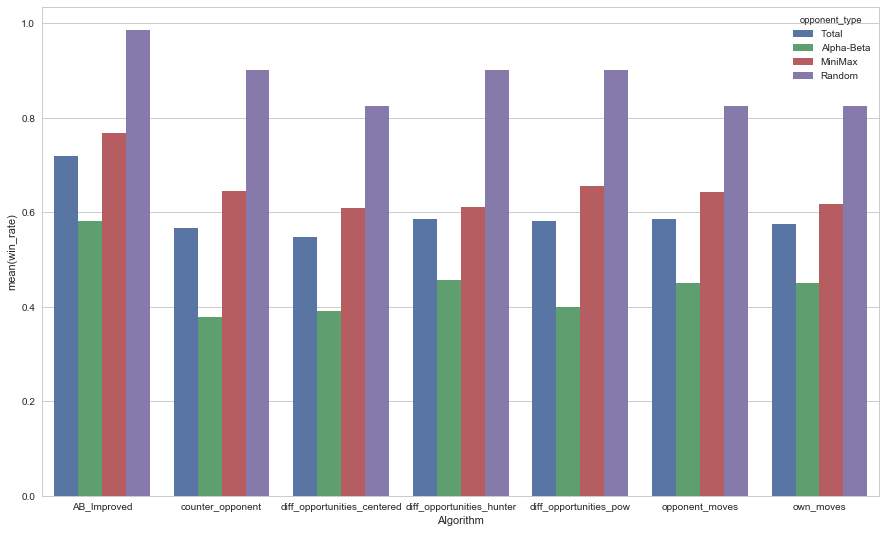

In [6]:
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context(rc={'figure.figsize': (15, 9)})
sns.barplot(x='Algorithm', y='win_rate', hue='opponent_type', data=df2)

As can be seen, the `AB_Improved` heuristic is better in every category, followed by the `diff_opportunities_hunter` heuristic. The total score appears to similar for the `diff_opportunities_pow` heuristic; this is, however, due to higher winning rate against the easier MiniMax opponents that don't use iterative deepening, whereas the score against Alpha-Beta pruning opponents is worse.

In general, it appears to be that heuristics favoring better moves for the player tend to achieve higher scores than aggressive methods that try to hinder the opponent.

In lack of a better (own!) implementation, the `diff_opportunities_hunter` heuristic was selected for submission.